#Statistics.com: "Social Data Mining", Shilad Sen
#Lesson 1: Managing data & recommenders

Humans generate huge social datasets.
Wikipedians have edited pages over half a billion times.
Twitter users generate nearly a billion tweets every day.

In this lesson you'll hone your Python data skills to efficiently analyze these datasets, and practice your craft in the context of basic recommender algorithms. More specifically, you will:

 * Prepare your Python development environment for the course.
 * Deepen your understanding of the four basic Python data structures: lists, dictionaries, sets, and tuples. Learn to select the appropriate data structures for a scenario.
 * Apply streaming techniques to analyze datasets that cannot fit in memory.
 * Use Python's `yield` keyword to ease streaming and code reuse.
 * Understand and implement association-based recommendation algorithms (if you liked ``The Matrix`` you'll like...).
 * Begin learning to evaluate the time complexity of your Python code.

#1. Python data structures

This section of the lesson provides you with a refresher on the data structures you previously learned in Python. It should take about 45 minutes (not including the assignment). 

As with the other lessons, **I encourage you to follow along and type the examples into your own Python interpreter or ipython notebook.**

###1.1. Lists
Here's a short refresher on lists. Let's presume that you run a book website and are storing the numeric rating values for a particular book in a list called `ratings`.

In [11]:
ratings = [3.5, 5.0, 2.0, 1.5, 3.0, 5.0]
print(ratings[1])        # second element
print(ratings[-1])       # last element
ratings[1] = 4.0         # reassign second element
ratings.append(1.0)      # add a low rating
print(ratings[1:4])      # the second element through the fourth, inclusive
ratings.sort()           # sort the list in place
print(ratings)
print(1.0 * sum(ratings) / len(ratings))   # the mean rating, "1.0 *" is required to convert the expression to a float in Python2.x

# print out all high rating values
for r in ratings: 
    if r >= 4.0: print('found a high rating:', r)

5.0
5.0
[4.0, 2.0, 1.5]
[1.0, 1.5, 2.0, 3.0, 3.5, 4.0, 5.0]
2.85714285714
('found a high rating:', 4.0)
('found a high rating:', 5.0)


If you'd like more information, the Python Programming Wikibook provides excellent supplementary tutorials on [lists](http://en.wikibooks.org/wiki/Python_Programming/Lists).

###1.2. Dictionaries: 
Lists store values associated with a consecutive numeric index. Dictionaries, on the other hand, can store values associated with any key.   A dictionary only stores one value for every key. In other words, it cannot have duplicate keys. 

Let's presume that you want to enhance your website so that it doesn't just store the raw rating values. 
You would like to associate each rating with a particular person using their first name.
For this case, we would create a dictionary whose **keys** are users' first names, and whose **values** are their ratings.

In [15]:
person_ratings = { 'Anne' : 4.0, 'Matt' : 3.5, 'Dave' : 4.5, 'Jane' : 1.5}

print(person_ratings['Matt'])    # get the value associated with a particular key
print(person_ratings.keys())     # set of first names, can be iterated over using a for loop
print(person_ratings.values())   # list of rating values, can be iterated over using a for loop.

# check whether a particular key exists.
if 'Anne' in person_ratings:
    print(person_ratings['Anne'])

# loop over all people and print out the names of high raters.    
for name in person_ratings:
    if person_ratings[name] >= 4.0:
        print('found high rater:', name)

3.5
['Jane', 'Anne', 'Matt', 'Dave']
[1.5, 4.0, 3.5, 4.5]
4.0
('found high rater:', 'Anne')
('found high rater:', 'Dave')


If you'd like more information, the Python Programming Wikibook provides excellent supplementary tutorials on [dictionaries](http://en.wikibooks.org/wiki/Python_Programming/Dictionaries).

### 1.3. Tuples

Tuples function very similarly to lists with one important exception. They are *immutable* - they cannot be changed once created. 

In [69]:
ratings = (3.5, 5.0, 2.0, 1.5, 3.0, 5.0)   # notice the parenthesis instead of brackets
print(ratings)

(3.5, 5.0, 2.0, 1.5, 3.0, 5.0)


###1.4. Sets

Lists efficiently store an ordered collection of elements, but sometimes we need a collection that can quickly determine membership. (More about what "quickly" actually means later). A set supports this case efficiently. However, in exchange for this efficiency it does not support duplicate values, and does not remember the order in which things were added. 

To return to our example, presume we wanted to keep track of the first names of everybody who provides a rating of 1.5 or lower:

In [19]:
book1_ratings = { 'Anne' : 4.0, 'Matt' : 3.5, 'Dave' : 4.5, 'Jane' : 1.5}
book2_ratings = { 'Scott' : 1.0, 'Matt' : 1.5, 'Dave' : 4.0, 'Jane' : 1.0}

low_raters = set()    # creates a new empty set

for name in book1_ratings:
    if book1_ratings[name] <= 1.5:
        low_raters.add(name)
        
for name in book2_ratings:
    if book2_ratings[name] <= 1.5:
        low_raters.add(name)

# Print out the results. Note that 'Jane' only appears once
print('low raters are', low_raters)

# check membership for a set using in.
if 'Matt' in low_raters:
    print('Matt is a low rater')
else:
    print('Matt is not a low rater')

('low raters are', set(['Jane', 'Matt', 'Scott']))
Matt is a low rater


If you'd like more information, the Python Programming Wikibook provides excellent supplementary tutorials on [sets](http://en.wikibooks.org/wiki/Python_Programming/Sets).

###1.5. Nested data structures

When performing data analysis, these three data structures are commonly combined to efficiently represent more sophisticated relationships.  For example, we could have included the `book1_ratings` and `book2_ratings` dictionaries in a single `book_ratings` dictionary keyed by book title:

In [26]:
all_book_ratings = {}  # empty dictionary
all_book_ratings['Lean In'] = { 'Anne' : 4.0, 'Matt' : 3.5, 'Dave' : 4.5, 'Jane' : 1.5}
all_book_ratings['Inferno'] = { 'Scott' : 1.0, 'Matt' : 1.5, 'Dave' : 4.0, 'Jane' : 1.0}

low_raters = set()    # creates a new empty set

for title in all_book_ratings:   # we don't use the book titles for now
    book_ratings = all_book_ratings[title]   # get a single book's rating dictionary
    for name in book_ratings:
        if book_ratings[name] <= 1.5:
            low_raters.add(name)

# Print out the results. Note that 'Jane' only appears once
print('low raters are', low_raters)


('low raters are', set(['Jane', 'Matt', 'Scott']))
CPU times: user 48 µs, sys: 5 µs, total: 53 µs
Wall time: 52.9 µs


If you'd like more details, the [Pasteur institute](http://www.pasteur.fr/) has developed a short tutorial describing [nested data structures](http://www.pasteur.fr/formation/infobio/python/ch10.html)

### 1.6. Data structure summary
Watch the first 12 minutes of [Alex Gaynor's PyCon talk](http://pyvideo.org/video/420/pycon-2011--the-data-structures-of-python) to reinforce the concepts above. To recap, lists, dictionaries, and sets provide distinct features:

Lists:

 * Stores values sequentially
 * Retains the ordering of elements added to it.
 * Allows duplicate values
 * Literals can be created using square brackets: `x = [3, 9, 7]`
 * New elements can be added using `append()`
 * Provides fast indexing (e.g. `ratings[1]`)
 
Dictionaries:

 * Stores values associated with a unique key
 * Does not retain the ordering of keys added to it
 * Does not allow duplicate keys, but...
 * Allows duplicate values
 * Literals can be created using curly brackets: `x = {'a' : 3, 'q' : 9, 'c' : 7}`
 * New elements can be added using indexing: `x['z'] = 3`
 * Provides fast lookup by key (e.g. `x['q']`)
 
Tuples:

 * Identical to lists, but they cannot be changed.
 * Literals can be created using parenthesis: `x = (3, 9, 7)`
 
Sets:

 * Stores a collection of distinct values.
 * Does not allow duplicate values.
 * Does not retain the ordering of elements added to it.
 * Literals can be created by passing a list to the  set constructor: `x = set([3, 9, 4])`
 * New elements can be added using add `x.add(12)`.
 * Does not provide indexing, but provides fast membership checking via `in`
 
**All four data structures support iteration using the `for` loop and membership checking using `in`.**



#2. Streaming large datasets

This section of the lesson will show you how to analyze datasets that cannot fit in memory. It should take you approximately 30 minutes to complete this section.

In this course, you'll stream datasets that cannot fit in memory at once. Typically, you'll create variables that accumulate quantities you're interested in and update these variables as you stream through the **records** in a file.

We'll practice streaming using the MovieLens 10M dataset, which contains anonymized data from the [MovieLens movie recommender](http://movielens.org). The dataset we will analyze contains roughly ten million movie ratings. (As an aside, during graduate school I led the development of the tagging system whose data is included in this dataset). 

Download the [MovieLens 10M dataset](http://files.grouplens.org/datasets/movielens/ml-10m.zip) and extract the zip file on your computer. Note the path to the directory you've placed the file in, because you'll need it later.

The data format for the files are detailed in the [ML-10M Readme](http://files.grouplens.org/datasets/movielens/ml-10m-README.html). We'll focus on ratings.dat. The file contains one movie rating per line. Each line has four `'::'` delimited fields: a numeric user id, movie id, and rating followed by a timestamp in [seconds since the epoch](http://en.wikipedia.org/wiki/Unix_time). An excerpt of the last 10 lines of the file follows:


### 2.1. Calculating the mean rating for MovieLens 10M

Let's begin by simply calculating the mean rating value. A traditional stats tool such as R or JMP would probably read this dataset into in-memory tables and then iterate through them. While this may work on this dataset if you have a powerful computer, what happens if the dataset contains one hundred million or one billion records? You're out of luck!

Luckily, we don't need to store the entire dataset into memory to calculate the mean. We only need two accumulator variables: the count of values and sum of values. We can then process the data file line by line, storing only one line in memory at a time:

In [53]:
%%time

path = '/Users/shilad/Downloads/ml-10M100K/ratings.dat'  # replace this with the full path to the ratings file on your computer

# accumulators necessary for the mean
rating_sum = 0.0
rating_count = 0

for line in open(path):
    tokens = line.split('::')    # tokens is a list of the four values in each record
    rating = float(tokens[2])
    rating_count += 1
    rating_sum += rating

print('mean of', rating_count, 'ratings is', (rating_sum / rating_count))

('mean of', 10000054, 'ratings is', 3.512421932921562)
CPU times: user 11.8 s, sys: 107 ms, total: 12 s
Wall time: 12 s


### 2.2. Calculating the histogram of rating for MovieLens 10M.

Next, we'll try to calculate a histogram of the rating values.

A dictionary naturally supports a histogram; the dictionary's keys are things you are counting (rating values) are the dictionary's values are the frequency with which the keys occur. The following intuitive code should work, but it fails! Why?

In [32]:
histogram = {}
for rating in [3.0, 5.0, 3.0, 2.0, 5.0, 1.5]:
    histogram[rating] += 1
print(histogram)

KeyError: 3.0

The code fails because python interprets `histogram[rating] += 1` as `histogram[rating] = histogram[rating] + 1`. Consider the very first iteration of the loop, when `rating` equals `3.0`. Python will try to calculate `histogram[3.0]`, and it will fail because histogram is empty!

We could work around this error by placing conditionals around the increment that check to see if the key already exists, but this is ugly:

In [33]:
histogram = {}
for rating in [3.0, 5.0, 3.0, 2.0, 5.0, 1.5]:
    if rating not in histogram:
        histogram[rating] = 0
    histogram[rating] += 1
print(histogram)

{1.5: 1, 2.0: 1, 3.0: 2, 5.0: 2}


Luckily, python provides us with a special variant of a dictionary that returns default values for keys that don't exist called defaultdict:

In [44]:
import collections
histogram = collections.defaultdict(int)

This code creates an enhanced dictionary that is very useful for dictionaries that contain accumulator variables. When a key that doesn't exist is request, the dictionary returns the result of `int()` (which returns `0`). You can replace the function `int` with `float`, or even `list` or `set` depending on the type of accumulator value you want.

Putting all the pieces together and normalizing the histogram to percentages, we get the following code to calculate the histogram for all 10M movielens ratings:

In [54]:
%%time

import collections       # for defaultdict

path = '/Users/shilad/Downloads/ml-10M100K/ratings.dat'  # replace this with the full path to the ratings file on your computer

# accumulator histogram of raw counts
histogram = collections.defaultdict(int)
for line in open(path):
    tokens = line.split('::')    # tokens is a list of the four values in each record
    rating = float(tokens[2])
    histogram[rating] += 1
        
num_ratings = sum(histogram.values())

# convert to percentages
percents = {}
for rating_value in histogram:
    percents[rating_value] = 100 * histogram[rating_value] / num_ratings
    
# display results
import pprint # for human-readable printing
print('raw histogram of', num_ratings, 'ratings is:')
pprint.pprint(dict(histogram))
print()
print('percentages of rating values for', num_ratings, 'ratings is:')
pprint.pprint(dict(percents))

('raw histogram of', 10000054, 'ratings is:')
{0.5: 94988,
 1.0: 384180,
 1.5: 118278,
 2.0: 790306,
 2.5: 370178,
 3.0: 2356676,
 3.5: 879764,
 4.0: 2875850,
 4.5: 585022,
 5.0: 1544812}
()
('percentages of rating values for', 10000054, 'ratings is:')
{0.5: 0,
 1.0: 3,
 1.5: 1,
 2.0: 7,
 2.5: 3,
 3.0: 23,
 3.5: 8,
 4.0: 28,
 4.5: 5,
 5.0: 15}
CPU times: user 12.2 s, sys: 197 ms, total: 12.4 s
Wall time: 12.4 s


Note that the only data structures we kept in memory where the two dictionaries (histogram and percents). In total we needed less than a kilobyte of memory (0.1% of a MB) to process this data!

# 3. Reusing datafile parsing code

This section of the lesson will show you how to write reusable functions that handle parsing input data into records. It should take you about 30 minutes to work through this section.

So far we've been treating the ML10M dataset as a collection of individual records, one per line. This makes the code that parses a record into into its components remarkably simple. 

What if we wanted to shift to treating ML10M as a collection of users - not records. The natural data structure for each user is a dictionary with keys movie ids (ints) and values ratings (floats):

In [ ]:
    user_ratings = { 456 : 0.5, 384 : 4.5, 121 : 3.0, ...}

You'll notice that the file is sorted by user, so we could still stream a user into memory at a time to conserve memory. The pseudocode for this method is relatively simple:

 

However, the actual python code looks more complex:

In [58]:
path = '/Users/shilad/Downloads/ml-10M100K/ratings.dat'  # replace this with the full path to the ratings file on your computer

user_ratings = {}             # dictionary from movie id to user rating
prev_user_id = -1     #  user id

for line in open(path):
    tokens = line.split('::')    # tokens is a list of the four values in each record
    user_id = int(tokens[0])
    movie_id = int(tokens[1])
    rating = float(tokens[2])
    
    # if the current line represents a new user, process the previous user's ratings
    if user_id != prev_user_id and len(user_ratings) > 0:
        # YOUR ALGORITHMIC PROCESSING "WORK" FOR THE USER WOULD GO HERE
        # SINCE THIS IS AN EXAMPLE, WE HAVE NOTHING
        
        # mark new user as current user, clear out old user's ratings
        user_ratings.clear()
        prev_user_id = user_id        
    
    # record user rating
    user_ratings[movie_id] = rating
    prev_id = user_id

Yuck!  If I want to analyze a stream of users somewhere else in my codebase, I have to duplicate all this code, breaking the ["Don't Repeat Yourself" (DRY) principle](http://en.wikipedia.org/wiki/Don't_repeat_yourself). To work around this, it's best to restructure your data parsing code to use a "generator" using Python's ["yield" keyword](http://stackoverflow.com/questions/231767/the-python-yield-keyword-explained):

In [60]:
%%time

def read_users(path):
    user_ratings = {}     # dictionary from movie id to user rating
    prev_user_id = -1     #  user id
    
    for line in open(path):
        tokens = line.split('::')    # tokens is a list of the four values in each record
        user_id = int(tokens[0])
        movie_id = int(tokens[1])
        rating = float(tokens[2])
            
        # if the current line represents a new user, process the previous user's ratings
        if user_id != prev_user_id and len(user_ratings) > 0:
            # this tells Python to use the value of user_ratings 
            # for the next iteration of the for loop at the bottom of this cell
            yield user_ratings
            
            # mark new user as current user, clear out old user's ratings
            user_ratings.clear()
            prev_user_id = user_id        
        
        # record user rating
        user_ratings[movie_id] = rating
        prev_id = user_id
    
    # process the very last user in the file
    yield user_ratings

path = '/Users/shilad/Downloads/ml-10M100K/ratings.dat'  # replace this with the full path to the ratings file on your computer

num_users = 0
for user in read_users(path):
    num_users += 1
print('num_users:', num_users)

('num_users:', 69879)
CPU times: user 21.9 s, sys: 194 ms, total: 22.1 s
Wall time: 22.1 s


#4. Managing noise in large datasets

Social data typically follows the [90 / 9 / 1 rule](http://www.nngroup.com/articles/participation-inequality/). Only 10% of users contribute data, and 1% of users contribute most of the data. These types of inequality appear across many entities. For example, in Wikipedia, this same inequality appears when you study edits per user, edits per article, and articles per language.

To effectively manage these lopsided datasets, your analyses will need to cope with wide differences in sample sizes within social data. Take our movie rating examples. Let's say we are trying to rank movies by mean rating. Should a movie with 2 ratings of 5.0 be ranked higher than a movie with 1000 ratings averaging 4.9? Your intitution probably says no.

A common technique to account for varying sample sizes across groups (i.e. ratings grouped by movie) adds a fixed number of values following the overall expected distribution to each group. In this case, we would add a fixed number of ratings with the overall mean rating of 3.51:



In [78]:
num_fake_ratings = 5
mean_rating = 3.51

def robust_mean(rating_values):
    num_ratings = len(rating_values) + num_fake_ratings
    sum_ratings = sum(rating_values) + num_fake_ratings * mean_rating
    return sum_ratings / num_ratings

example_movies = [
    [1.5] * 1,          # one rating of 1.5
    [5.0] * 2,          # two ratings of 5.0
    [4.97] * 100,       # 100 ratings averaging 4.95
    [4.9] * 1000,       # 1000 ratings averaging 4.9
]

for rating_values in example_movies:
    n = len(rating_values)
    real_mean = 1.0 * sum(rating_values) / len(rating_values)
    print('robust_mean %.4f for %d ratings with real mean %.4f' 
          %  (robust_mean(rating_values), n, real_mean))

robust_mean 3.1750 for 1 ratings with real mean 1.5000
robust_mean 3.9357 for 2 ratings with real mean 5.0000
robust_mean 4.9005 for 100 ratings with real mean 4.9700
robust_mean 4.8931 for 1000 ratings with real mean 4.9000


Notice that we arbitrarily set the number of fake ratings to 5. If we bump the number of fake ratings up to 10, our robust mean estimate becomes more "conservative:"

<pre>
    robust_mean 3.3273 for 1 ratings with real mean 1.5000
    robust_mean 3.7583 for 2 ratings with real mean 5.0000
    robust_mean 4.8373 for 100 ratings with real mean 4.9700
    robust_mean 4.8862 for 1000 ratings with real mean 4.9000
</pre>

This technique can also be applied to binary data, such as thumbs up / thumbs down ratings:

In [79]:
# Throughout this example a value of 0 represents thumbs down and 1 represents thumbs up.
num_fake_ratings = 5
mean_fraction_up = 0.4    # 40% thumbs up

def robust_proportion(thumb_values):
    num_ratings = len(thumb_values) + num_fake_ratings
    sum_ratings = sum(thumb_values) + num_fake_ratings * mean_fraction_up
    return sum_ratings / num_ratings

# Thumb ratings for a collection of exaple movies.
example_movies = [
    [0] * 1,                    # one thumbs down
    [1.0] * 2,                  # two thumbs up
    [1.0] * 97 + [0.0] * 3,     # 97 thumbs up, 3 thumbs down
    [1.0] * 920 + [0.0] * 80    # 920 thumbs up, 80 thumbs down
]

for thumb_values in example_movies:
    n = len(thumb_values)
    real_prop = 1.0 * sum(thumb_values) / len(thumb_values)
    print('robust_porportion %.4f for %d ratings with real proportion %.4f' 
          %  (robust_proportion(thumb_values), n, real_prop))

robust_porportion 0.3333 for 1 ratings with real proportion 0.0000
robust_porportion 0.5714 for 2 ratings with real proportion 1.0000
robust_porportion 0.9429 for 100 ratings with real proportion 0.9700
robust_porportion 0.9174 for 1000 ratings with real proportion 0.9200


This technique has a deep justification based on Bayesian conjugate priors. Take one of statistics.com's Bayesian course to learn more!


#5. Introduction to recommendation algorithms

This section of the lesson describes one key recommendation algorithm used in sites such as Netflix and Amazon to identify related products. At the end of this lesson, you'll understand how to identify related items based on rating patterns, and you'll be more skilled at stream-based data analysis. It should take you about 30 minutes to work through this section.

Imagine you've been tasked with building an association based recommender for MovieLens. These recommenders look for strongly related items (i.e. movies) to create rules such as "If you like *Finding Nemo*, you'll like *Toy Story*."

Given a *target* item (e.g. *Finding Nemo*), association-based recommenders typically calculate the similarity between the target and every other *candidate* item and return the most similar items. [Pearson's Correlation](http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) is most commonly used as the measure of similarity between items. 

More specifically, let $X = \{x_1,...,x_n\}$ contain ratings for the target item (e.g. *Finding Nemo*) and $Y = \{y_1,...,y_n\}$ contain the ratings for a candidate item (e.g. *Toy Story*). Each vector only contains ratings from users who rated *both* movies, and the ratings are paired, so $x_1$ and $y_1$ are user 1's ratings for both movies, etc. Pearson's correlation $r_p$ is:

$$
r_p(X, Y)  =
\frac{cov(X, Y)}{\sigma_X \sigma_Y} = 
\frac{\sum ^n _{i=1}(x_i - \bar{X})(y_i - \bar{Y})}{\sqrt{\sum ^n _{i=1}(x_i - \bar{X})^2} \sqrt{\sum ^n _{i=1}(y_i - \bar{Y})^2}}
$$

To calculate this correlation, we can use scipy's pearson r, which returns both $p_r$ and the $p$ value for $r_s$.


In [65]:
from scipy.stats import pearsonr
(r_s, p) = pearsonr([3, 5, 6], [3, 2, 1])
print(r_s)

-0.981980506062


First we'll lookup some movie ids to calculate the correlation between. You can find the mapping from movie title to movie id by opening the `movie.dat` in the ML10M zip file using NotePad, TextEdit, etc. Here are a few interesting possibilities:

So to calculate the correlation between two movies, all we need to do is find each user who has rated both movies, add append their ratings for each movie to the X and Y vector. Given our earlier `readUsers` function, we're in good shape!

In [68]:
%%time

def movie_similarity(path, movie_id1, movie_id2):
    """
        Takes the path to the movie.dat and two movie ids (as ints).
        Returns the pearson correlation between the movie ids.
    """
    X = []
    Y = []
    
    for user in readUsers(path):
        # If the user has rated both movies, add their ratings to X and Y
        if movie_id1 in user and movie_id2 in user:
            X.append(user[movie_id1])
            Y.append(user[movie_id2])
            
    r_s, p = pearsonr(X, Y)
    return r_s

movies = {
          1 : 'Toy Story',
          596 : 'Pinnochio',
          4474 : 'Beaches',
          6377 : 'Finding Nemo',
          6874 : 'Kill Bill: Vol. 1',
    }

for movie_id in movies:
    title = movies[movie_id]
    sim = movie_similarity(path, 1, movie_id)
    print('similarity between Toy Story and', title, 'is', sim)

('similarity between Toy Story and', 'Toy Story', 'is', 1.0)
('similarity between Toy Story and', 'Beaches', 'is', 0.2130343926320353)
('similarity between Toy Story and', 'Pinnochio', 'is', 0.36206997304435956)
('similarity between Toy Story and', 'Kill Bill: Vol. 1', 'is', 0.11124122872720185)
('similarity between Toy Story and', 'Finding Nemo', 'is', 0.49490784918783309)
CPU times: user 1min 49s, sys: 1.23 s, total: 1min 50s
Wall time: 1min 50s


You might notice that this is a slow calculation! For your homework assignment, you'll simultaneously calculate the correlation between Toy Story and the other movies in a single pass to speed things up.

The [item-based recommender algorithm](http://stackoverflow.com/a/16447806/141245), a popular algorithms used by companies such as Netflix and Amazon, is closely based on Pearson correlation. The algorithm simply predicts that your rating for a movie (i.e. Toy Story) is the weighted average of your ratings for movies that are similar to it. The weights are the correlations calculated above.  

For example presume you rated Kill Bill a 1.5, Pinnochio 4.0, and Finding Nemo 5.0. Our python code above estimated the correlation for these movies  0.11, 0.36, and 0.49 respectively. The item-based algorithm would predict your rating for Toy Story is:

$$ prediction(Toy Story) = \frac{0.11 * 1.5 + 0.36 * 4.0 + 0.49 * 5.0}{0.11 + 0.36 + 0.49} = 4.22 $$

#Algorithmic time complexity in a nutshell


For the last part of this lesson, you'll start learning to characterize the time complexity of your code. It will take you about an hour to work through this section.

When we analyze time complexity, we talk about how an algorithm "scales up." As we add more movies, users, or ratings, how much slower will the algorithm be? For example, consider the Python program above to calculate the overall average rating in the MovieLens 10M dataset. How does it change if we increase the size of the dataset? Since the main loop iterates over each rating, it makes sense that if we increase the size of the dataset by a factor of two (to 20M ratings), the program will be twice as slow.

We call this type of algorithm performance "linear" because it scales linearly with the size of the dataset. More formally, many people refer to this type of time complexity `O(n)` (pronounced "Big-Oh of n"), where `n` is the number of ratings of the dataset.

Other than linear, several other algorithmic time complexities appear frequently. Getting the length of a list or dictionary using `len()` always takes roughly the same amount of time - regardless of how many things are in the list! This time complexity is called "constant" or `O(1)`.

Take a few moments to watch MyCodeSchool's YouTube video on calculating algorithmic time complexity:



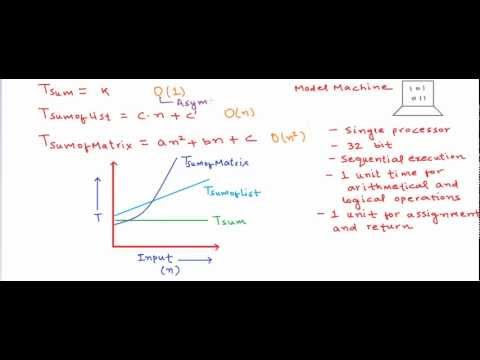

In [1]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('8syQKTdgdzc')

Consider the time complexity of iterating over n ratings and counting the number of high ratings:

    ratings = [3.0, 4.0, .... ]
    num_high = 0
    for r in ratings:
        if r > 3.5:
            num_high += 1

This algorithm has linear time complexity. The innermost loop runs once for each rating, and the performance of the code in a single iteration(evaluating the "if" statement and incrementing num_high) does not depend on the number of ratings.

On the other hand, consider the code to find the nearest neighbor for each user:

    pairs = {}
    for u1 in users:
    
        # find the closest user for u1
        closest_u = 0
        closest_similarity = 0
        for u2 in users:
            s = similarity(u1, u2)
            if s > closest_similarity:
                closest_similarity = s
                closest_u = u2
                
        # record the 
        pairs[u1] = closest_u

This code has *nested* loops. Let's call the number of users n. For each of the n iterations of the outer loop, the inner loop also runs n times. Thus, the innermost loop has time a complexity of $O(n^2)$ However, this doesn't consider any additional time complexity related to the call to `similarity(u1, u2)`. If this function does not take a constant amount of time, the time complexity will change.

**Time complexity of basic data structure operations:** In general, for all the data structures from section 1 (list, dict, set, tuple) the basic operations  (add, delete, retrieve, membership using "in") are constant time and do not increase with the size of the collection. One major exception is list deleting and list membership checking, which are both linear. The Python wiki has a more detailed analysis of [Python data structure time complexity](https://wiki.python.org/moin/TimeComplexity).